<a href="https://colab.research.google.com/github/ajayjai30/FLIGHT-BOOKING-PRICE-PREDICTION/blob/main/FLIGHT_BOOKING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Flight_Booking.csv')
K=df['price']

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df=df.drop(df.columns[0],axis=1)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

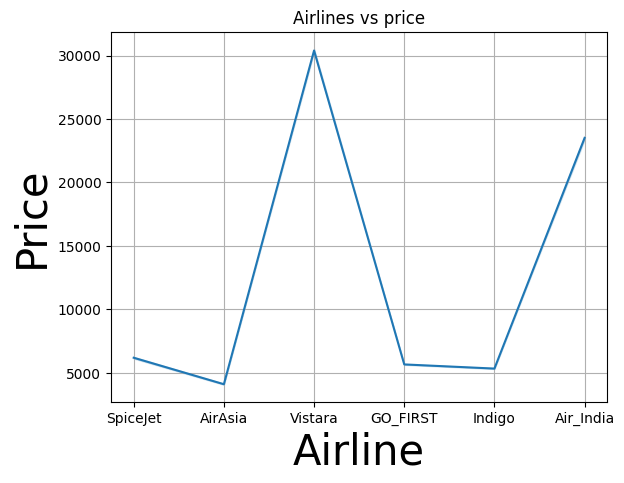

In [ ]:
#DataVisualiazation
sns.lineplot(x=df['airline'],y=df['price'])
plt.title("Airlines vs price")
plt.xlabel('Airline',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.grid()
plt.show()

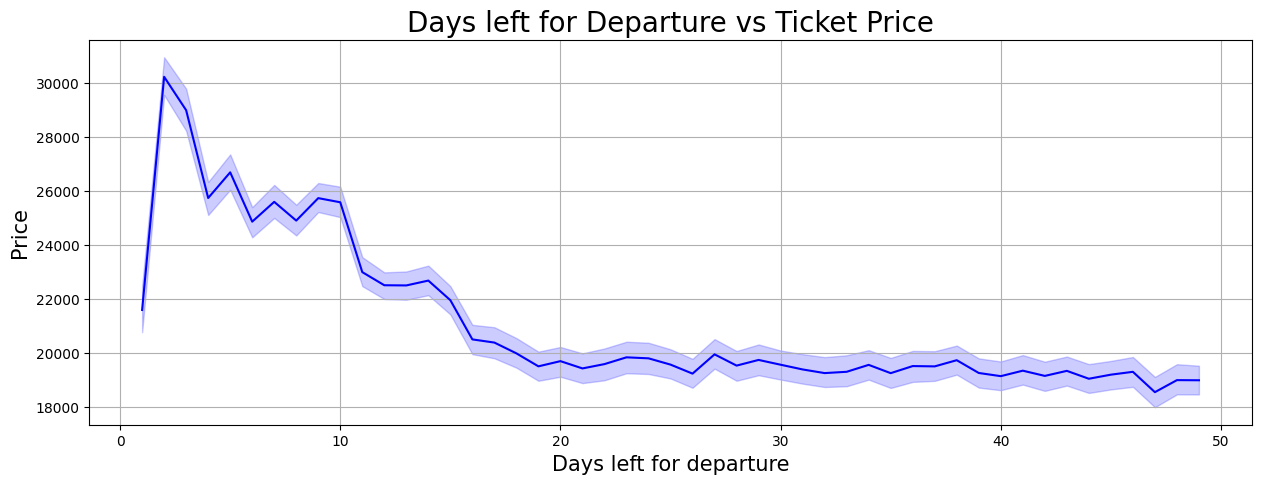

In [ ]:
#days left for flight departure vs ticket price
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days left for Departure vs Ticket Price',fontsize=20)
plt.xlabel("Days left for departure",fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid()
plt.show()

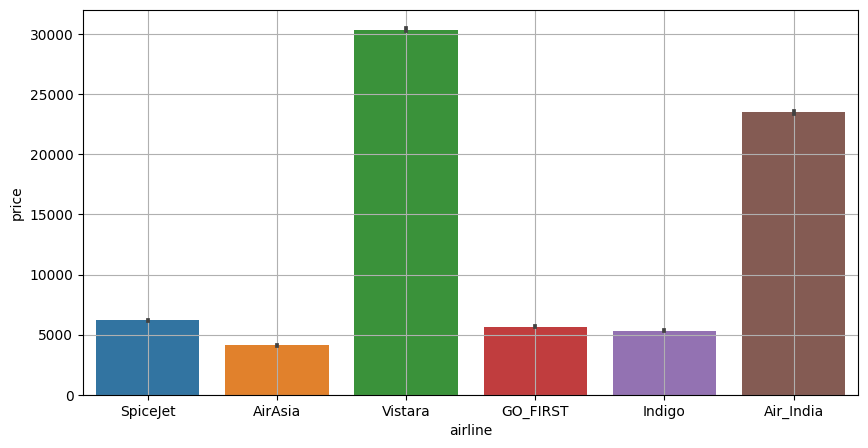

In [ ]:
#airline vs price
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)
plt.grid()
plt.show()

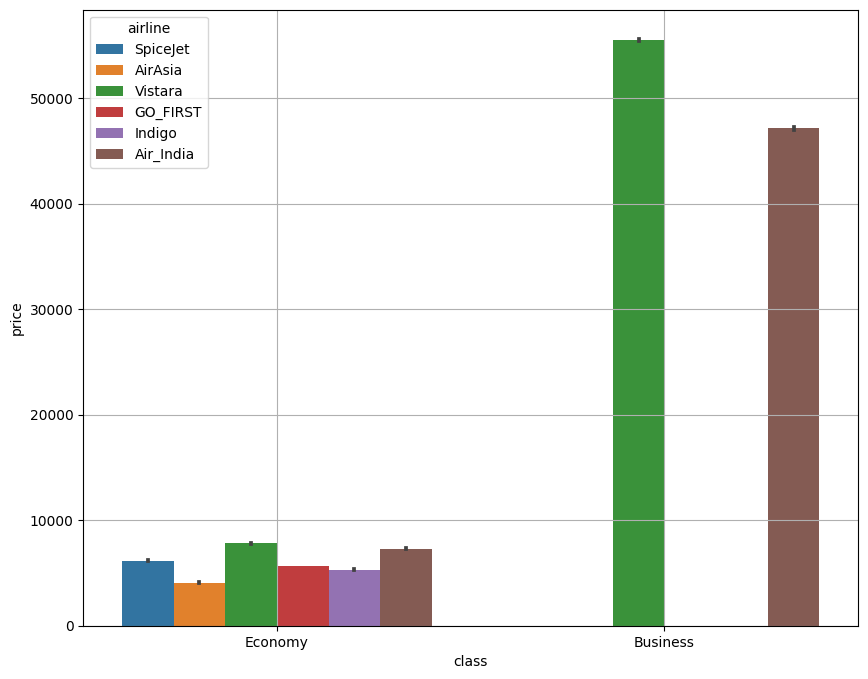

In [ ]:
#class vs price based on airline
plt.figure(figsize=(10,8))
sns.barplot(x=df['class'],y=df['price'],hue=df['airline'])
plt.grid()
plt.show()

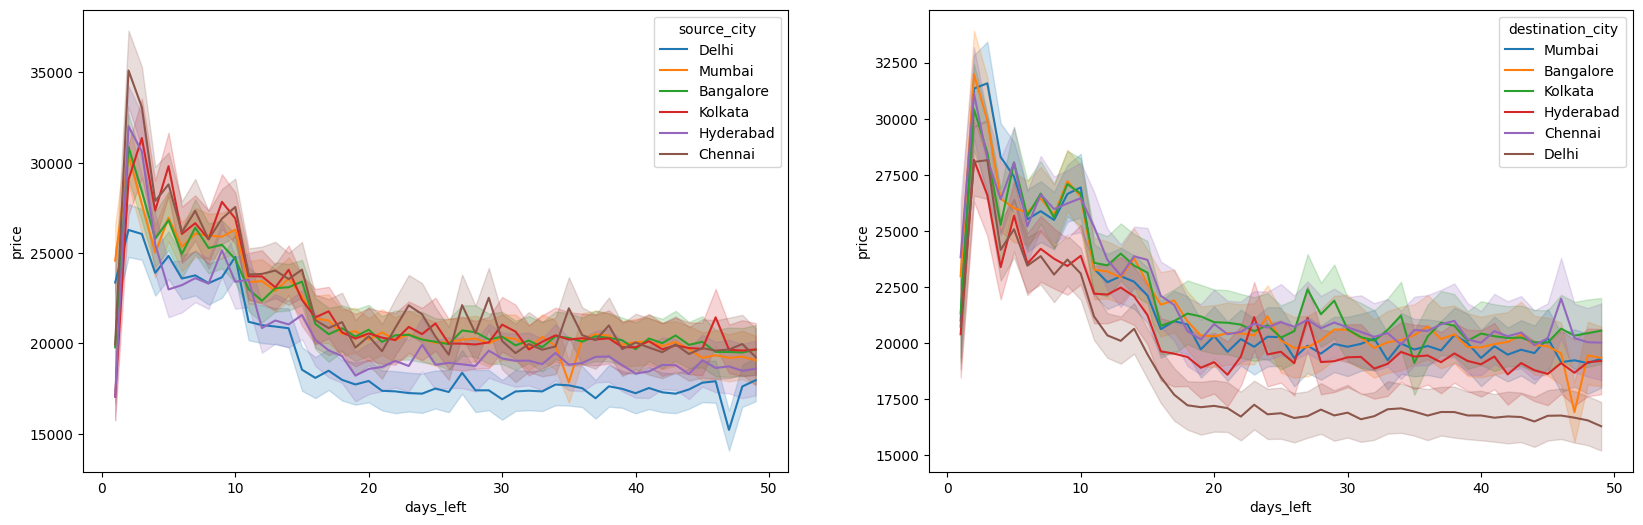

In [ ]:
# days left vs price based on the source_city and the destination_city
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['source_city'],ax=ax[0])
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['destination_city'],ax=ax[1])
plt.show()

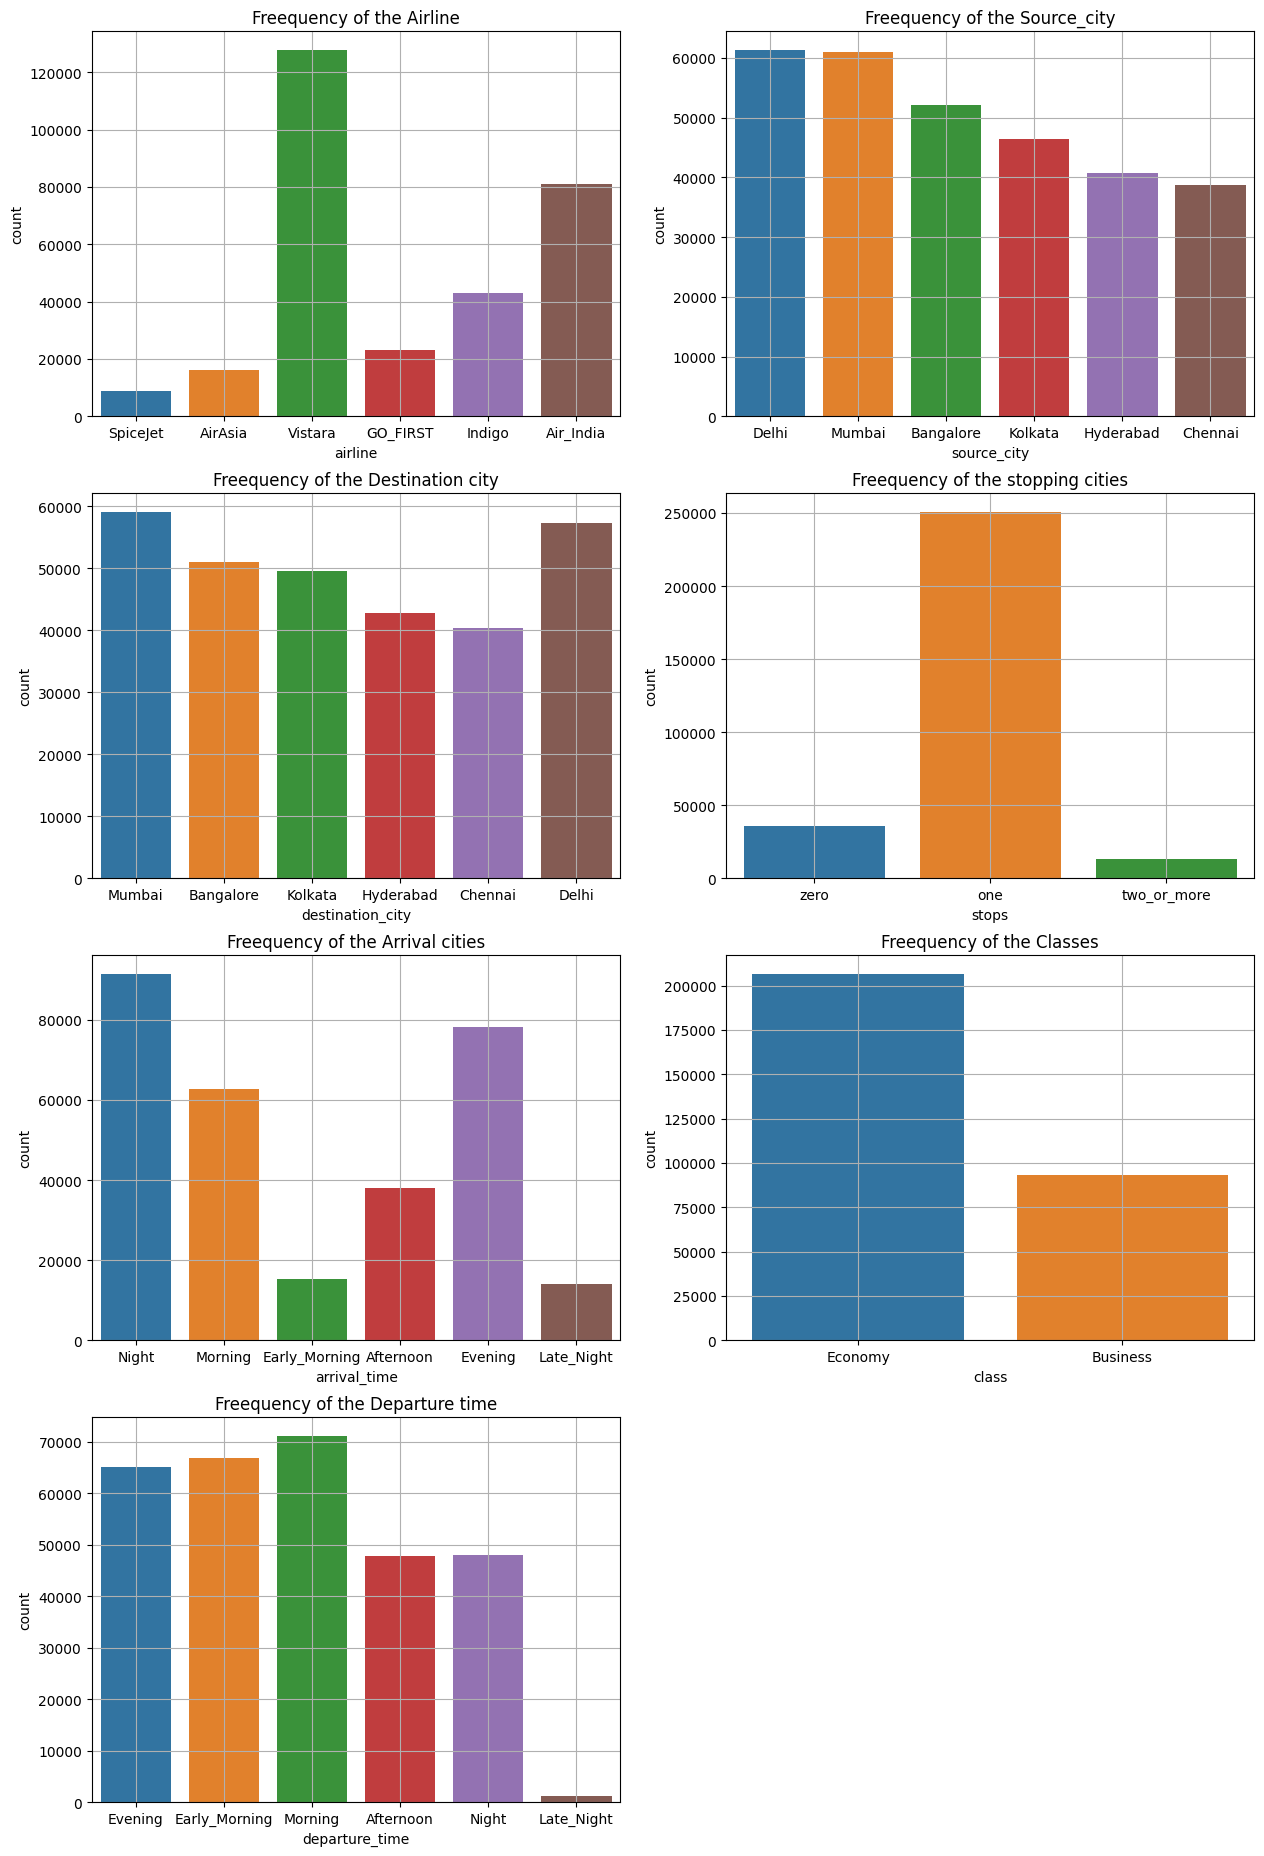

In [ ]:
#categorical features visualization
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title("Freequency of the Airline")
plt.grid()

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title("Freequency of the Source_city")
plt.grid()

plt.subplot(4,2,3)
sns.countplot(x=df['destination_city'],data=df)
plt.title("Freequency of the Destination city")
plt.grid()

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title("Freequency of the stopping cities")
plt.grid()

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title("Freequency of the Arrival cities")
plt.grid()

plt.subplot(4,2,6)
sns.countplot(x=df['class'],data=df)
plt.title("Freequency of the Classes")
plt.grid()

plt.subplot(4,2,7)
sns.countplot(x=df['departure_time'],data=df)
plt.title("Freequency of the Departure time")
plt.grid()

plt.show()




In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['airline']=l.fit_transform(df['airline'])
df['source_city']=l.fit_transform(df['source_city'])
df['departure_time']=l.fit_transform(df['departure_time'])
df['stops']=l.fit_transform(df['stops'])
df['arrrival_time']=l.fit_transform(df['arrival_time'])
df['destination_city']=l.fit_transform(df['destination_city'])
df['class']=l.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  arrrival_time     300153 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 27.5+ MB


<ipython-input-18-55cb605cd772>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


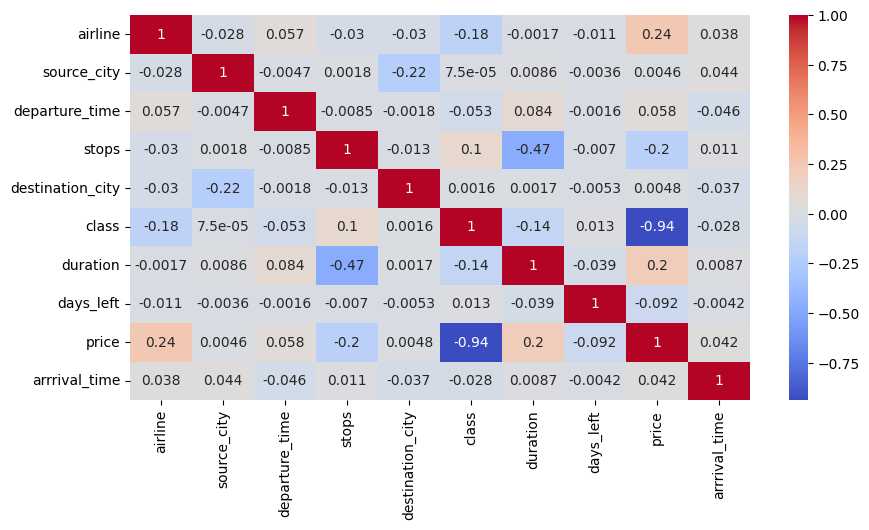

In [ ]:
#feature selection using correlation and heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for i in df.columns:
  if((df[i].dtype!='object')&(i!='price')):
    col_list.append(i)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4  destination_city  2.885337
5             class  2.849370
6          duration  4.113876
7         days_left  3.976790
8     arrrival_time  3.684550


In [ ]:
X=x.drop(columns=['stops'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if((df[col].dtype!='object')&(col!='price')):
    col_list.append(col)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)


            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4  destination_city  2.885337
5             class  2.849370
6          duration  4.113876
7         days_left  3.976790
8     arrrival_time  3.684550


In [ ]:
#linear regresssion
y=K
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_value'])
difference

,Actual_value,Predicted_value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)
root_mean_sq_error=np.sqrt(mean_sq_error)
root_mean_sq_error

0.904554350718816
4624.994868016881
0.4353581089683268
49200540.293722


7014.309680483319

<ipython-input-24-ddac81671780>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-24-ddac81671780>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


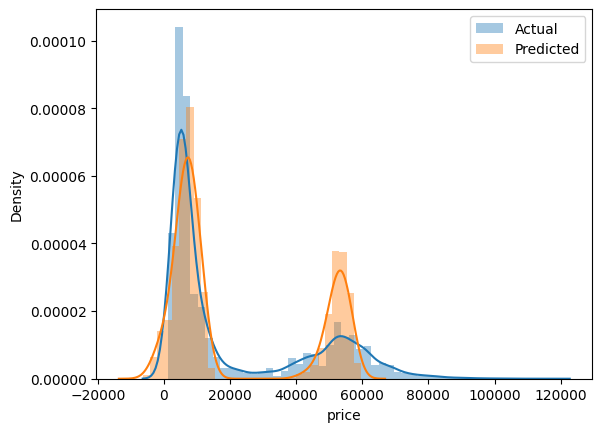

In [ ]:
#plotting of linear regression
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(r2_score(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9755113820820629
1175.7181261903575
0.07395524198346518
12623448.440897666
3552.9492595444794


In [ ]:
#RandomForestclassifier
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred))
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_pred,y_test))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_pred,y_test)))
#cant run because of exceeding cpu limit

In [ ]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()
plt.show()